# Customer Segmentation Case study - Mall Data¶

In [1]:
import pandas as pd

In [2]:
mall= pd.read_csv(r'C:\Users\Laxman\OneDrive\Desktop\Data Files_1\Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Explaratory Data Analysis

Find the top 3 customers based on their average spending score.

In [5]:
top3 = mall.groupby('CustomerID')[['Spending Score (1-100)']].mean().reset_index()
top3.sort_values(by='Spending Score (1-100)',ascending=False).head(3)

,CustomerID,Spending Score (1-100)
11,12,99.0
19,20,98.0
145,146,97.0


In [6]:
import seaborn as sns

Find the distribution of annual income for the customers

C:\Users\Laxman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

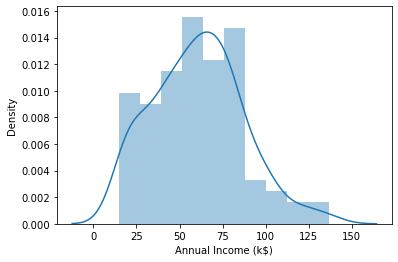

In [7]:
sns.distplot(mall['Annual Income (k$)'])

Draw a scatterplot between annual income and spending score

C:\Users\Laxman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

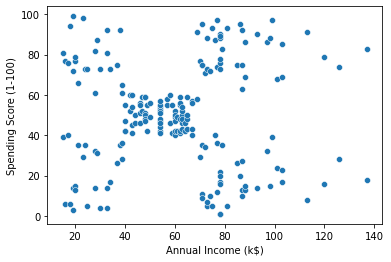

In [8]:
sns.scatterplot(mall['Annual Income (k$)'],mall['Spending Score (1-100)'])

# Data Preprocessing¶

In [9]:
#Dummy variables
mall_dummy = pd.get_dummies(mall,columns=['Gender'],drop_first=True)
mall_dummy.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [10]:
mall_final = mall_dummy.drop(columns=['CustomerID'])
mall_final.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# Building the clustering model

In [11]:
from sklearn.cluster import KMeans

In [12]:
#Choosing the number of clusters is very critical in a clustering problem

#We need to plot the number of clusters in x-axis and we will plot the error in y axis (WCSS)

In [13]:
error = []
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit(mall_final)
    error.append(km.inertia_)

C:\Users\Laxman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laxman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laxman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Laxman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Wi

In [14]:
error

[308862.05999999994,
 212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51181.511473820305,
 44391.82080487081,
 40857.18667502089,
 37517.352482852904,
 34756.24961281534,
 32609.68312219182,
 30503.84348544974,
 28138.84246031746,
 25994.60748981411]

C:\Users\Laxman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

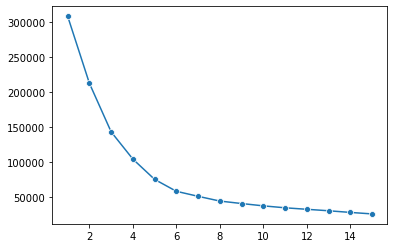

In [15]:
sns.lineplot(range(1,16),error,marker='o')

In [16]:
# We can choose the number of clusters as 5
km = KMeans(n_clusters=5)
km.fit(mall_final)

C:\Users\Laxman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [17]:
mall_dummy['Cluster'] = km.predict(mall_final)
mall_dummy

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,1,19,15,39,1,0
1,2,21,15,81,1,3
2,3,20,16,6,0,0
3,4,23,16,77,0,3
4,5,31,17,40,0,0
...,...,...,...,...,...,...
195,196,35,120,79,0,1
196,197,45,126,28,0,4
197,198,32,126,74,1,1
198,199,32,137,18,1,4


In [18]:
mall_dummy.groupby('Cluster').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Cluster,,,,,
0,23.000000,45.217391,26.304348,20.913043,0.391304
1,162.000000,32.692308,86.538462,82.128205,0.461538
2,86.265823,43.088608,55.291139,49.569620,0.417722
3,24.000000,25.521739,26.304348,78.565217,0.391304
4,163.500000,40.666667,87.750000,17.583333,0.527778


C:\Users\Laxman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

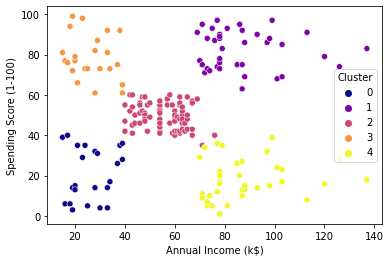

In [19]:
sns.scatterplot(mall_dummy['Annual Income (k$)'],mall_dummy['Spending Score (1-100)'],hue=mall_dummy['Cluster'],palette='plasma')